In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys
import json
from collections import Counter

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#sys.path.insert(0, '/mnt/d/projects/bassline_transcription')
sys.path.insert(0, '/scratch/users/udemir15/ELEC491/bassline_transcription')

from representation import replace_sustain, encode_midi_sequence, transpose_to_C
from bassline_transcriber.transcription import frequency_to_midi_sequence

from dataset import *
from utilities import *

In [2]:
directories = get_directories('../data/directories.json')
_, track_dicts, track_titles = read_metadata(directories, 'TechHouse_total_track_dicts.json')

## Midi Sequences dataframe

In [3]:
midi_sequences, valid_titles, keys, types = [], [], [], []
for title in track_titles:
    try:
        key, scale_type = track_dicts[title]['Key'].split(' ')
        pitch_track = load_quantized_pitch_track(title, directories)[1]
        midi_sequence = frequency_to_midi_sequence(pitch_track, silence_code=0)
        midi_sequences.append(midi_sequence)
        valid_titles.append(title)
        keys.append(key)
        types.append(scale_type)
    except KeyboardInterrupt:
        sys.exit(0)  
    except:
        pass     
midi_sequences = np.array(midi_sequences).reshape(-1,512)

In [5]:
df = make_dataframe(midi_sequences, valid_titles, keys, types)
#df.to_csv('../data/metadata/midi_sequences.csv', index=False, header=False)

In [6]:
note_counter, note_counter_T = count_notes(df)

Original min: 23, max: 48
Transposed min: 13, max: 48


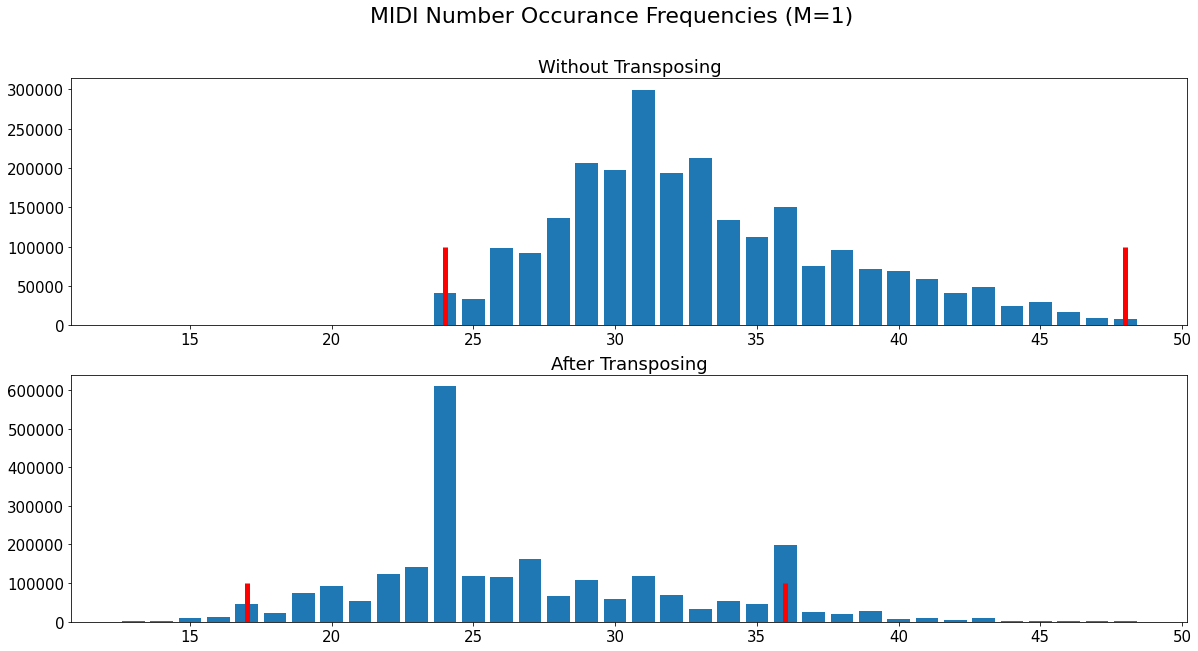

In [8]:
plot_note_occurances(note_counter, note_counter_T, 1)

In [10]:
df.shape

(8896, 515)

## Encoding

In [12]:
with open('../data/metadata/bad_beat_f0_titles.txt', 'r') as infile:
    bad_titles = infile.read().split('\n')
print(len(bad_titles))

4420


In [13]:
M=1
codes, titles, keys, scales = [], [], [], []
for title, key, scale, midi_sequence in zip(df['Title'], df['Key'], df['Scale'], df.iloc[:, 3:].to_numpy()):   
    try:  
        # bad track filter
        if title not in bad_titles:
            key = track_dicts[title]['Key'].split(' ')[0]
            code = encode_midi_sequence(midi_sequence, key, M, MIN_NOTE=17, MAX_NOTE=36)
            if code is not None:
                codes.append(code)
                titles.append(title)
                keys.append(key)
                scales.append(scale)
    except KeyboardInterrupt:
        sys.exit(0)  
    except:
        pass
codes = np.array(codes).reshape(-1,512)
df_codes = make_dataframe(codes, titles, keys, scales)

In [14]:
df_codes.shape

(3776, 515)

In [18]:
np.unique(df_codes.iloc[:, 3:].to_numpy())

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21])

In [ ]:
pitch_track = np.array(([261/2]*31 + [0] + [120]*31 + [0] + [41]*31 + [0] + [69]*31 + [0])*4)
midi_sequence = frequency_to_midi_sequence(pitch_track, silence_code=0)

code = encode_midi_sequence(midi_sequence, 'C', M)
print(code)

In [ ]:
M=1
title = track_titles[4096]
key = track_dicts[title]['Key'].split(' ')[0]

pitch_track = load_quantized_pitch_track(title, directories)[1]
midi_sequence = frequency_to_midi_sequence(pitch_track, silence_code=0)

code = encode_midi_sequence(midi_sequence, key, M)
print(code)